In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
dataset = pd.read_csv(r"../Algerian_forest_fires_dataset_UPDATE.csv", header=1)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,657,34,76,13,34,5,not fire
1,2,6,2012,29,61,13,13,644,41,76,1,39,4,not fire
2,3,6,2012,26,82,22,131,471,25,71,3,27,1,not fire
3,4,6,2012,25,89,13,25,286,13,69,0,17,0,not fire
4,5,6,2012,27,77,16,0,648,3,142,12,39,5,not fire


In [44]:
#check any missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region ForestFir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,7,2012,37,37,18,2,889,129,14.6 9,125,104,fire,NaN


In [45]:
# split the regions
dataset.loc[:122, "Region"] = 0
dataset.loc[122:, "Region"] = 1
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,657,34,76,13,34,5,not fire,0.0
1,2,6,2012,29,61,13,13,644,41,76,1,39,4,not fire,0.0
2,3,6,2012,26,82,22,131,471,25,71,3,27,1,not fire,0.0
3,4,6,2012,25,89,13,25,286,13,69,0,17,0,not fire,0.0
4,5,6,2012,27,77,16,0,648,3,142,12,39,5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0,854,16,44.5,45,169,6.5,fire,1.0
242,27,9,2012,28,87,15,44,411,65,8,1,62,0,not fire,1.0
243,28,9,2012,27,87,29,5,459,35,7.9,4,34,0.2,not fire,1.0
244,29,9,2012,24,54,18,1,797,43,15.2,17,51,0.7,not fire,1.0


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [47]:
# region in float, it should 'integer'
dataset[["Region"]] = dataset[["Region"]].astype(int)


In [48]:
#checking null values
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [49]:
# removing null value
data = dataset.dropna().reset_index(drop=True)

In [50]:
data.iloc[[122]]
data = data.drop(122).reset_index(drop=True)
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,7,571,25,8.2,6,28,0.2,not fire,1


In [51]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [52]:
# remove space in string
data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [53]:
# change column to interger 
data[['day','month', 'year', 'Temperature', 'RH', 'Ws']] = data[['day','month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [54]:
# convert float to float

object = [features for features in data.columns if data[features].dtypes=='O']
for i in object:
    if i != 'Classes':
        data[i] = data[i].astype(float)


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


##### Data Analysis

In [56]:

#data.to_csv("Algerian_forest_fires_dataset.csv", index=False)


In [57]:
# no need of some columns dropping that
new_df = data.drop(['day','month', 'year'], axis=1)
save_data = new_df.to_csv("Algerian_forest_fires_dataset.csv", index=False)
new_df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [58]:
# encoding 'Classes' column
new_df['Classes'] = np.where(new_df['Classes'].str.contains('not fire'), 0, 1) #noto fire = 0, fire = 1
new_df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [59]:
df = new_df
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,657.0,34.0,76.0,13.0,34.0,5.0,0,0
1,29,61,13,13.0,644.0,41.0,76.0,1.0,39.0,4.0,0,0
2,26,82,22,131.0,471.0,25.0,71.0,3.0,27.0,1.0,0,0
3,25,89,13,25.0,286.0,13.0,69.0,0.0,17.0,0.0,0,0
4,27,77,16,0.0,648.0,3.0,142.0,12.0,39.0,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,854.0,16.0,44.5,45.0,169.0,6.5,1,1
239,28,87,15,44.0,411.0,65.0,8.0,1.0,62.0,0.0,0,1
240,27,87,29,5.0,459.0,35.0,7.9,4.0,34.0,0.2,0,1
241,24,54,18,1.0,797.0,43.0,15.2,17.0,51.0,0.7,0,1


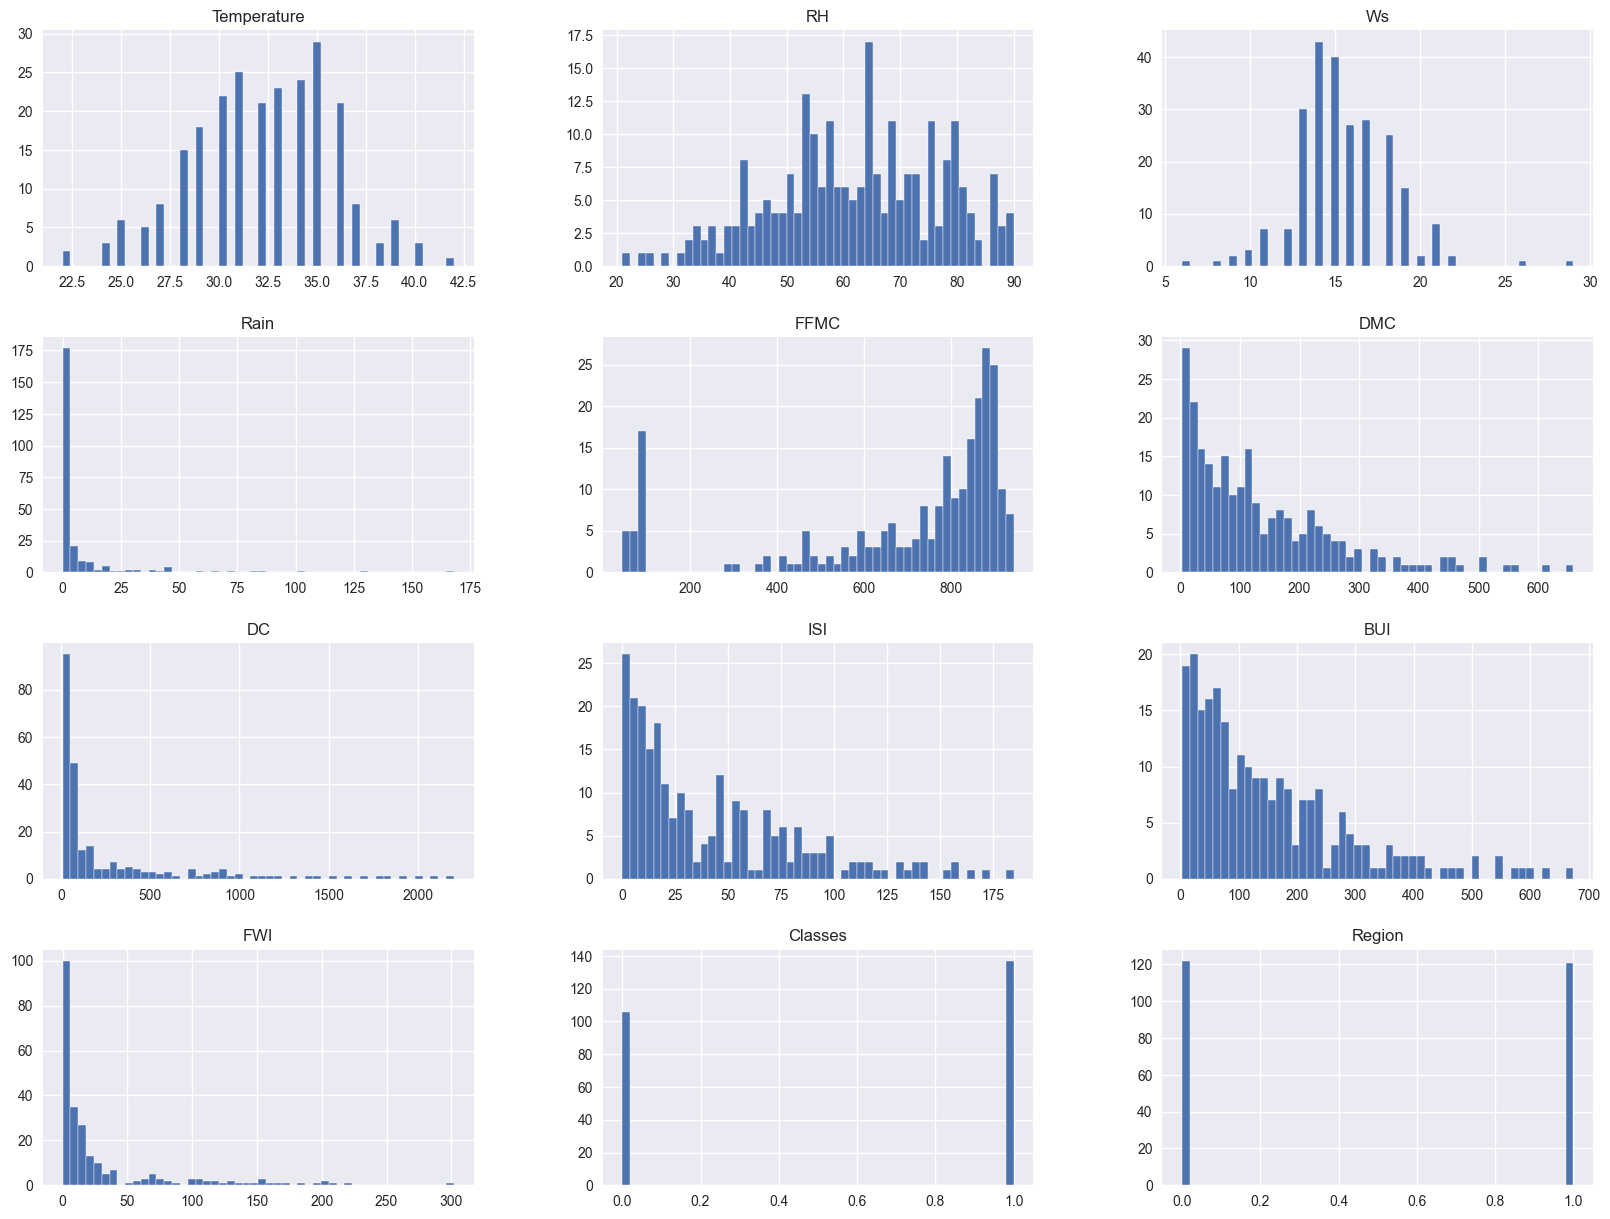

In [60]:
# plot density for all features
plt.style.use('seaborn-v0_8') 
df.hist(bins=50, figsize=(20,15))
plt.show()

In [61]:
# percentage of Pie Chart
percentage = df['Classes'].value_counts(normalize=True) * 100

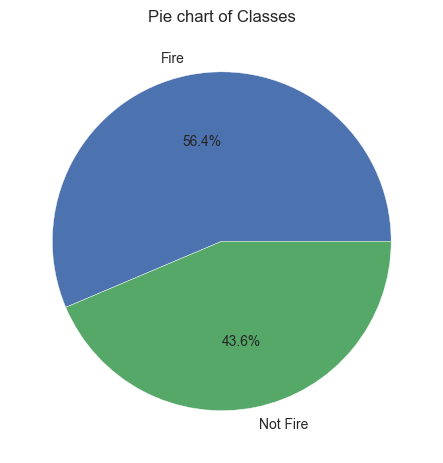

In [62]:
#plot pie chart
classLabels = ['Fire', 'Not Fire']
plt.Figure(figsize=(5,6))
plt.pie(percentage,labels=classLabels, autopct='%1.1f%%')
plt.title('Pie chart of Classes')
plt.show()

### Correlation

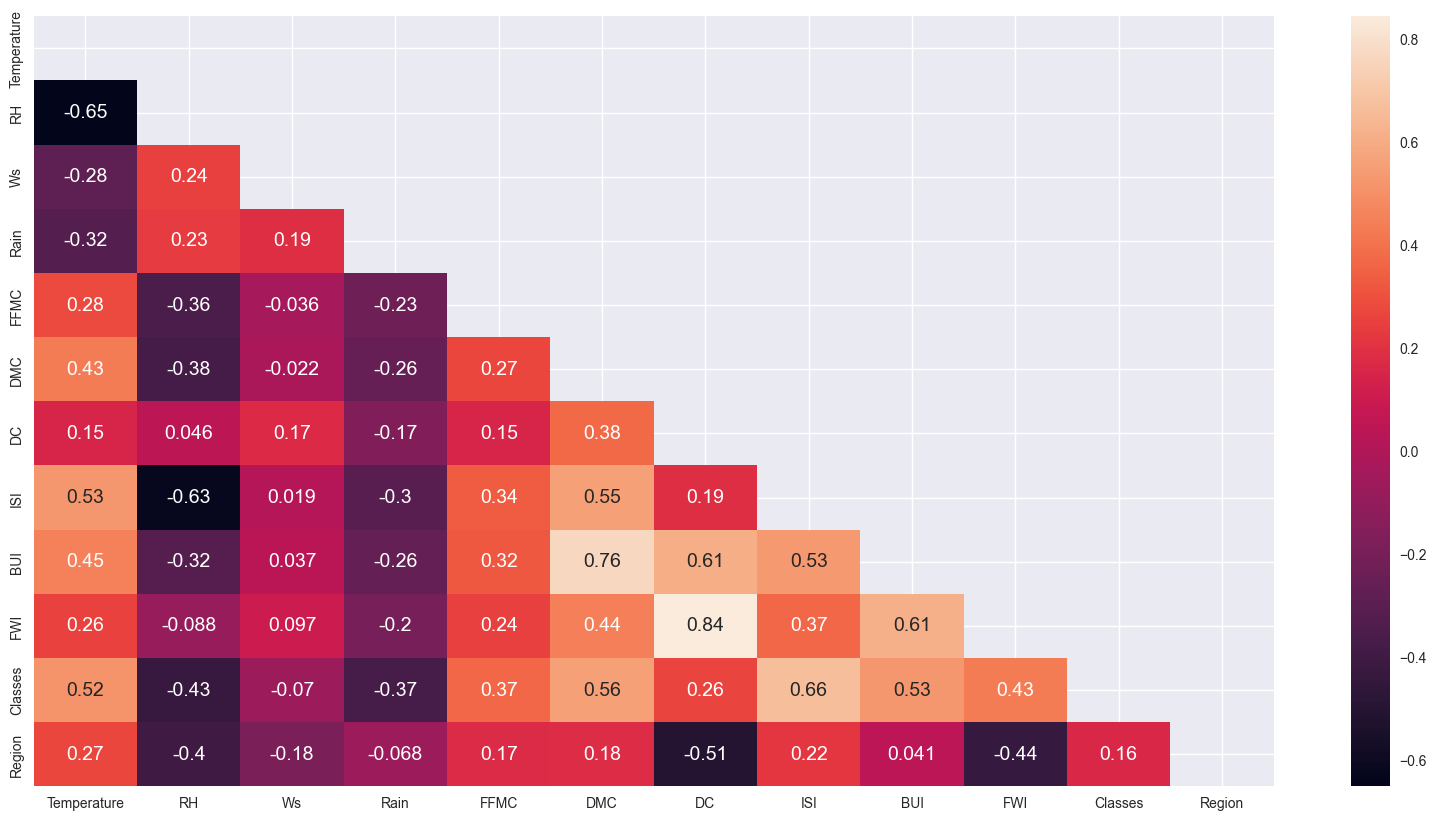

In [63]:
# correlation
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True # true 1 fasle 0
# visulaise the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={'size' : 14})
plt.show()

# Monthly fire analysis

In [64]:
# # Monthly fire analysis Bajaia Region
# df_temp = data.loc[data['Region']==0]
# df_temp['Classes'] = np.where(df_temp['Classes'].str.contains('not fire'),0,1)
# df_temp['Classes'].value_counts()

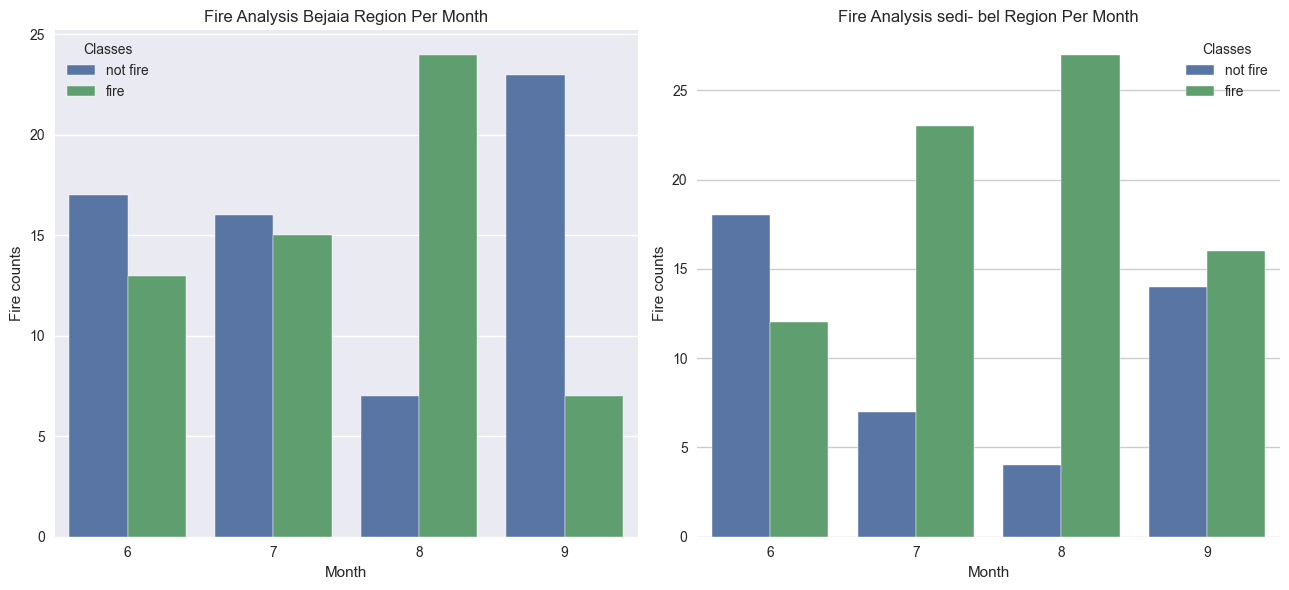

In [65]:
# Monthly fire analysis
data['Classes'] = np.where(data['Classes'].str.contains('not fire'), 'not fire', 'fire')
# Bajaia Region
df_temp = data.loc[data['Region'] == 0]  #in df motnh is rmoved so we used data as varaible here


plt.figure(figsize=(13, 6))  

plt.subplot(1, 2, 1)  
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df_temp)
plt.xlabel('Month')  
plt.ylabel('Fire counts')  
plt.title('Fire Analysis Bejaia Region Per Month')

#Sedi-bel

df_temp = data.loc[data['Region'] == 1]

plt.subplot(1, 2, 2)  
sns.countplot(x='month', hue='Classes', data=df_temp)
plt.xlabel('Month')  
plt.ylabel('Fire counts')  
plt.title('Fire Analysis sedi- bel Region Per Month')

# Show all subplots together
plt.tight_layout()
plt.show()


# Linear Regresssion

In [66]:
data = pd.read_csv("./Algerian_forest_fires_dataset.csv")

data['Classes'] = np.where(data['Classes'].str.contains('not fire'), 0, 1) #noto fire = 0, fire = 1
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,657.0,34.0,76.0,13.0,34.0,5.0,0,0
1,29,61,13,13.0,644.0,41.0,76.0,1.0,39.0,4.0,0,0
2,26,82,22,131.0,471.0,25.0,71.0,3.0,27.0,1.0,0,0
3,25,89,13,25.0,286.0,13.0,69.0,0.0,17.0,0.0,0,0
4,27,77,16,0.0,648.0,3.0,142.0,12.0,39.0,5.0,0,0


In [67]:
data['Classes'].value_counts()


Classes
1    137
0    106
Name: count, dtype: int64

In [68]:
X = data.drop("FWI", axis=1)
y = data["FWI"]

In [69]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,657.0,34.0,76.0,13.0,34.0,0,0
1,29,61,13,13.0,644.0,41.0,76.0,1.0,39.0,0,0
2,26,82,22,131.0,471.0,25.0,71.0,3.0,27.0,0,0
3,25,89,13,25.0,286.0,13.0,69.0,0.0,17.0,0,0
4,27,77,16,0.0,648.0,3.0,142.0,12.0,39.0,0,0


In [70]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(182, 11)
(61, 11)


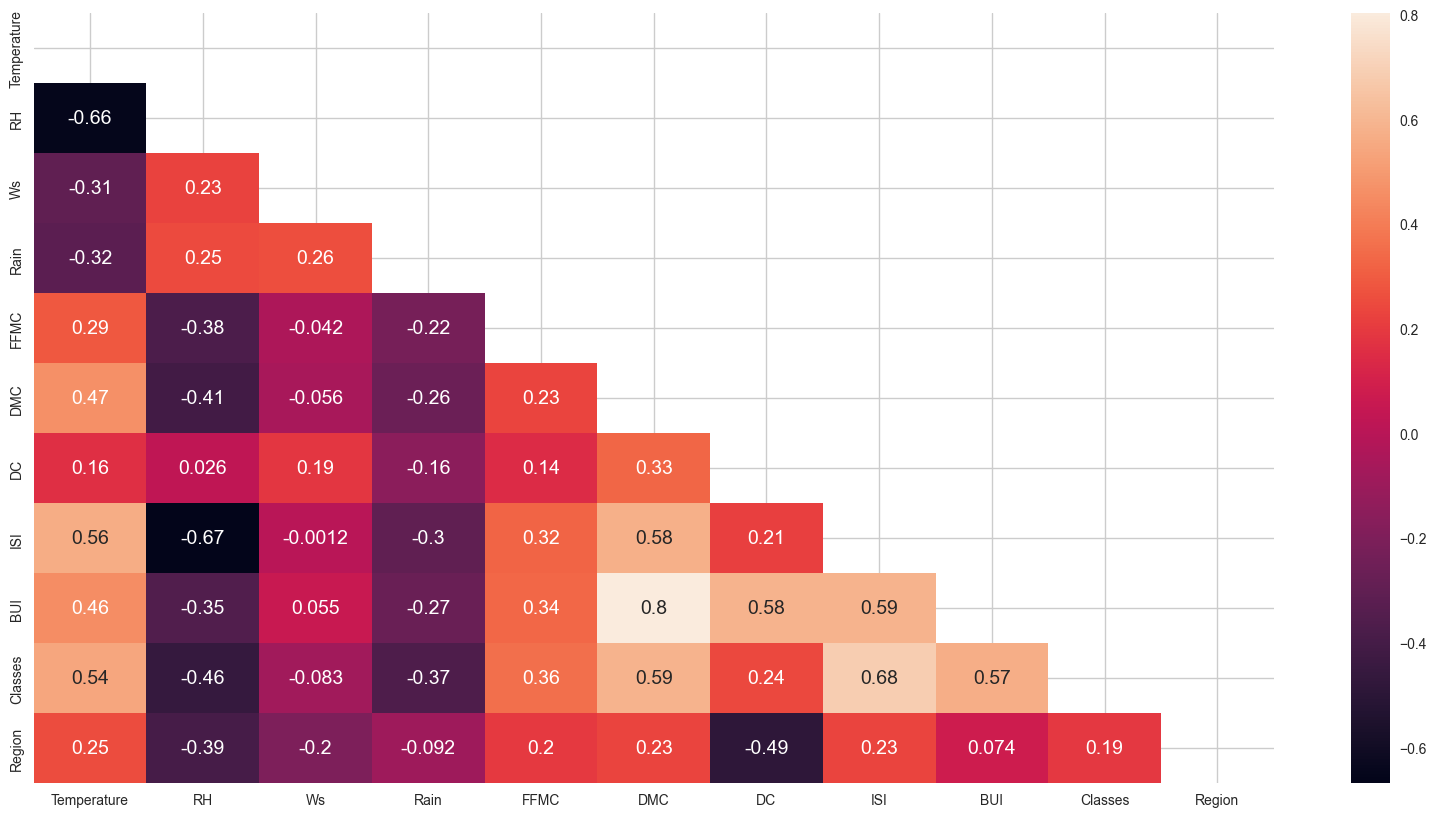

In [71]:
# correlation
mask = np.zeros_like(X_train.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True # true 1 fasle 0
# visulaise the correlation
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), mask=mask, annot=True, annot_kws={'size' : 14})
plt.show()

In [72]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to store correlated columns
    corr_matrix = dataset.corr()  # Compute correlation matrix

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Check correlation threshold
                colname = corr_matrix.columns[i]  # Get column name
                col_corr.add(colname)  # Add to the set

    return col_corr  

In [73]:
corr_features = correlation(X_train, 0.8)

print(corr_features)

{'BUI'}


In [74]:
# drop highly correlated features

X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
print(X_train.shape)
print(X_test.shape)


(182, 10)
(61, 10)


## Feature scaling

In [75]:
# feature sclaing or standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## Box plot to visualize th effect of standarizyation

Text(0.5, 1.0, 'X_train After Scaling')

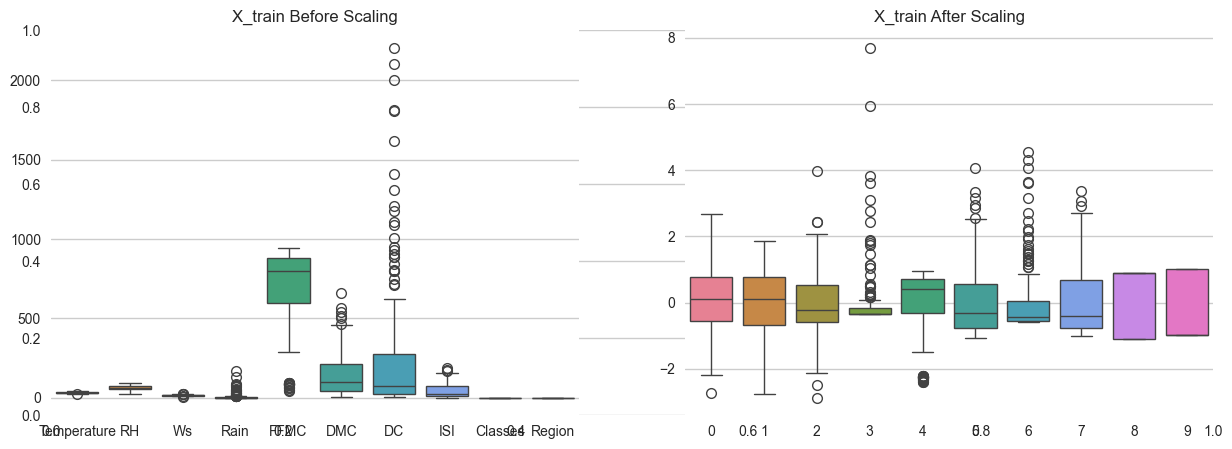

In [76]:
## box plot to understand the effect of standard scaler
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear regression model

mean_absolute_error(mae) :  14.99437900378846
R2  :  0.8278360498385999


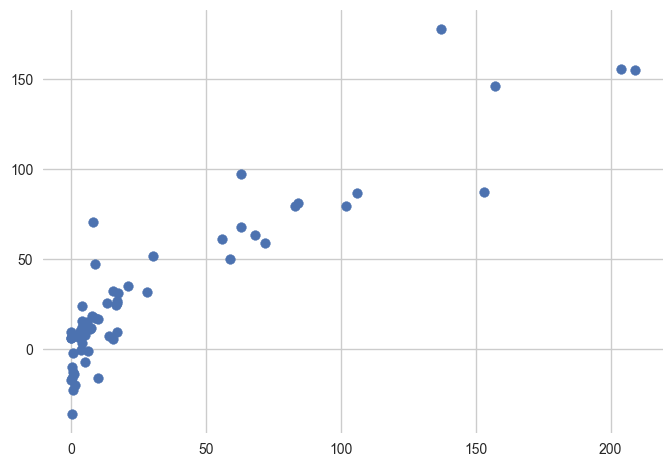

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


regr = LinearRegression()
regr.fit(X_train_scaled, y_train)

y_pred = regr.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

print('mean_absolute_error(mae) : ', mae)
print('R2  : ', r_squared)

plt.scatter(y_test, y_pred)

## Lasso Regression

mean_absolute_error(mae) :  13.864916521016776
R2  :  0.851172078943345


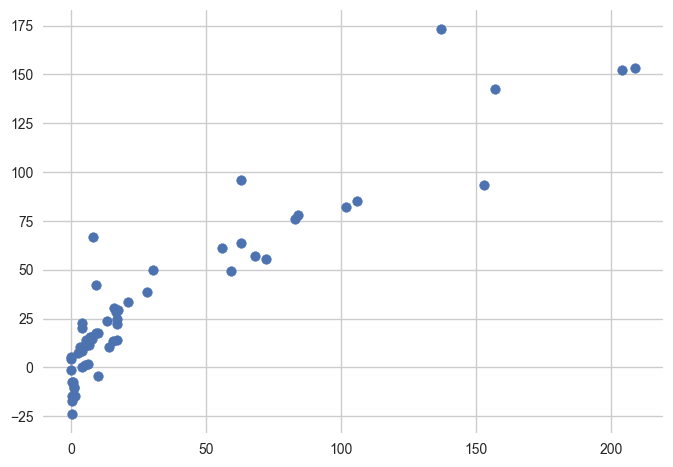

In [78]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

print('mean_absolute_error(mae) : ', mae)
print('R2  : ', r_squared)

plt.scatter(y_test, y_pred)

## Ridge Regression

mean_absolute_error(mae) :  15.004515762747197
R2  :  0.8280028095278463


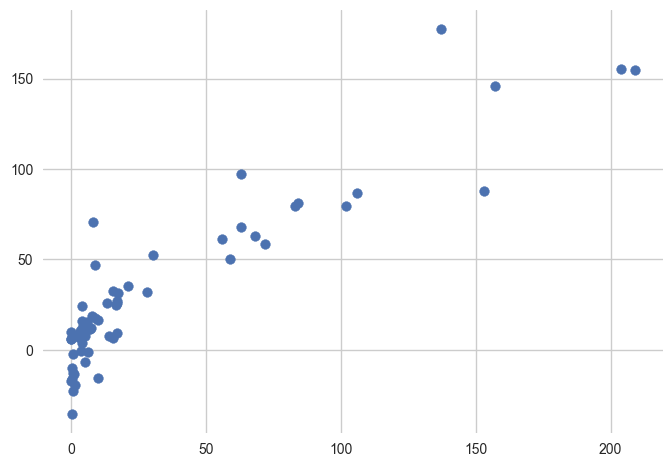

In [79]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score


ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

print('mean_absolute_error(mae) : ', mae)
print('R2  : ', r_squared)

plt.scatter(y_test, y_pred)

## Elastic Net

mean_absolute_error(mae) :  16.153244267275156
R2  :  0.7791212638210303


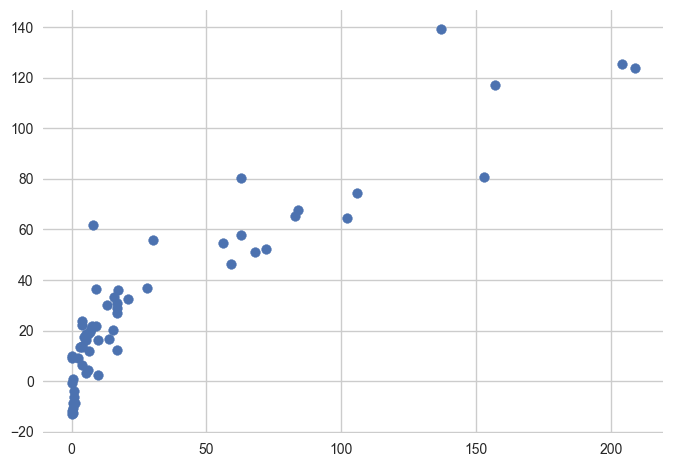

In [80]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score


elaNet = ElasticNet()
elaNet.fit(X_train_scaled, y_train)

y_pred = elaNet.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

print('mean_absolute_error(mae) : ', mae)
print('R2  : ', r_squared)

plt.scatter(y_test, y_pred)

## Lasso cross Validation

mean_absolute_error(mae) :  16.153244267275156
R2  :  0.7791212638210303


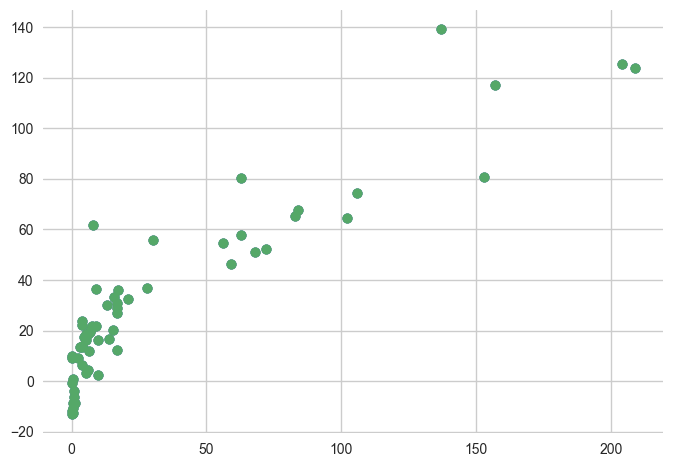

In [81]:
# lasso cross validation

from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=5)
lassoCV.fit(X_train_scaled, y_train)
y_pred_lasso = lassoCV.predict(X_test_scaled)

y_pred_lasso = lassoCV.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)

print('mean_absolute_error(mae) : ', mae)
print('R2  : ', r_squared)

plt.scatter(y_test, y_pred)

plt.scatter(y_test, y_pred)

## save file

In [82]:
import pickle

pickle.dump(scalar, open("scal.pkl", "wb"))
pickle.dump(lasso, open("lass.pkl", "wb"))